In [21]:
#Q1. How can you remove duplicate values in a dataset

In [22]:
import numpy as np
import pandas as pd

In [23]:
dataset = np.array([1,1,2,2,3,3,4,4,5,5])
print(dataset)

[1 1 2 2 3 3 4 4 5 5]


In [24]:
dataset_nodup = np.unique(dataset)
print(dataset_nodup)

[1 2 3 4 5]


In [25]:
set2 = [[1,2,3], [2,3,4], [1,1,1], [1,3,4]]
set2 = pd.DataFrame(set2)
print(set2)

   0  1  2
0  1  2  3
1  2  3  4
2  1  1  1
3  1  3  4


In [26]:
set2_nodup = set2.drop_duplicates(subset=0)
set2_nodup

,0,1,2
0,1,2,3
1,2,3,4


In [27]:
#Q2.You are given two tables - friend_request and request_accepted.
# Friend_request contains requester_id, time and sent_to_id
# and request_accepted table contains time, acceptor_id and requester_id.
# How will you determine the overall acceptance rate of requests?
#Write in both Python and SQL

In [28]:
import pandas as pd

friend_request = pd.DataFrame(
    {"requester_id": [1,2,3],
     "time":["1-1-18","1-2-18","1-31-18"],
     "send_to_id": [11,12,13]}
)

print(friend_request)

request_accepted = pd.DataFrame(
    {"time": ["1-2-18", "2-1-18"],
     "acceptor_id": [11,13],
     "requester_id": [1,3]}
)

print(request_accepted)

   requester_id  send_to_id     time
0             1          11   1-1-18
1             2          12   1-2-18
2             3          13  1-31-18
   acceptor_id  requester_id    time
0           11             1  1-2-18
1           13             3  2-1-18


In [29]:
matched = pd.merge(friend_request, request_accepted, how = "left",
                  left_on = ["requester_id", "send_to_id"],
                  right_on = ["requester_id", "acceptor_id"])
print (matched)

   requester_id  send_to_id   time_x  acceptor_id  time_y
0             1          11   1-1-18         11.0  1-2-18
1             2          12   1-2-18          NaN     NaN
2             3          13  1-31-18         13.0  2-1-18


In [30]:
import numpy as np
acceptance_rate = (len(matched["acceptor_id"]) - np.isnan(matched["acceptor_id"]).sum())/len(matched["requester_id"])
print(acceptance_rate)

0.6666666666666666


In [31]:
#SQL

In [32]:
#Q3. “Issuer” of a credit card are companies like Visa, Mastercard, American Express. Now we know the following rules:
# CC number starts with: '4' CC len : 16
# Issuer: VISA

# CC number starts with: '34', '37' CC len : 15
# Issuer : AMEX

# CC number starts with: '36' CC len : 14
# Issuer : Diners Club

# Credit card number starts with '4026', '417500', '4405', '4508', '4844', '4913', '4917'
# CC len : 16
# Issuer : VISAELECTRON

# Now write Python scripts to identify the issuer of the following credit card numbers:
# '4175004175004172' '4917491749174917' '346416800707698' 
# '376416800707698' '37641680070769832112' '36641680070769'
# 54545641680070769

In [33]:
#Q4. Write function: PrintCumulativeTimeSeries()
# Input: Three parameters: experiment_id, country, and vertical
# Output:
#   - Time series chart showing the uplift
#   - Overall % uplift on revenue, experiment vs. control: (red - blue) / blue %

In [34]:
import pandas as pd
file_loc = "/Users/siahuang/Documents/BA501/例子+课堂coding/python/"
file = "BA501_python_data.csv"
dataset = pd.read_csv(file_loc + file)
dataset.head(6)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS
5,FR,20170406,12624548,2887851716418524034,10.641677,15563614621402392174,ANDROID_APPS


In [35]:
# time series date format
dataset.date = pd.to_datetime(dataset.date, format='%Y%m%d')
dataset.head(6)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS
5,FR,2017-04-06,12624548,2887851716418524034,10.641677,15563614621402392174,ANDROID_APPS


In [36]:
# function: return a group by date for each experiment_id
def getData(dataset, test_id, country):
    temp = dataset[["date", "spend_usd"]][(dataset.experiment_id==test_id)&(dataset.country==country)]
    result = temp.groupby("date")["spend_usd"].sum()
    return(result)

In [37]:
control = getData(dataset, 12624549,"US")
experiment = getData(dataset, 12624548,"US")
print(control)

date
2017-04-01    20041.695113
2017-04-02    16520.942776
2017-04-03    14446.198889
2017-04-04    14573.102945
2017-04-05    15999.542189
2017-04-06    18818.000925
2017-04-07    19401.924479
Name: spend_usd, dtype: float64


In [38]:
# plot
import matplotlib.pyplot as plt
%matplotlib inline
def plotData(control, experiment):
    fig, ax = plt.subplots()
    ax.plot(experiment, color = "red", label="experiment")
    ax.plot(control, color="blue", label="control")
    ax.legend()
    plt.gcf().autofmt_xdate()

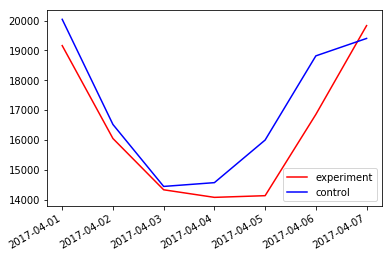

In [39]:
plotData(control, experiment)

In [40]:
# combine function
def PrintCumulativeTimeSeries(set, exp_id, country):
    control_set = getData(dataset, exp_id[0], country)[0] # 0 means first column, dates
    exp_set = getData(dataset, exp_id[1], country)[0]
    control_rev = getData(dataset, exp_id[0], country)[1] # 1 means second column, revenue (total spend
    exp_rev = getData(dataset, exp_id[1], country)[1]
    print ("Overall % uplift: " + str(exp_rev/control_rev*100-100) + "%")
    plotData(control_set, exp_set)

Overall % uplift: -2.8464645291500403%


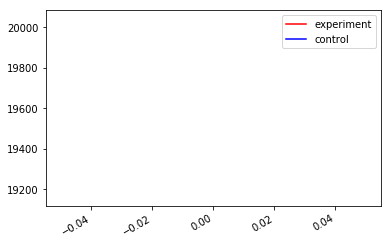

In [41]:
PrintCumulativeTimeSeries(dataset, [12624549, 12624548], "US")